#### Part 1
This is what I think the Loss function is. \
Loss function: $ L(w) = \frac{1}{2} \sum_{i=0}^{2} (y_i - w^T x^i)^2 $.

In [21]:
import numpy as np

# fix random seed for reproducibility
np.random.seed(1234)

x = np.random.rand(100, 1) * 2 - 1
y = x * x + np.random.rand(100, 1) * 0.01

# Define x in terms of the non-linear function
x_w2 = np.hstack((np.ones((100, 1)), x, x ** 2))

# Initialize the weights to zeros
w1 = np.zeros((3, 1))

# Set the learning rate and number of iterations
alpha = 0.1
num_iters = 1000

# Define the gradient of the cost function
def gradient(x, y, w1):
    m = x.shape[0]
    grad = (2 / m) * x.T.dot(x.dot(w1) - y)
    return grad

# Run gradient descent to update the weights
for i in range(num_iters):
    grad = gradient(x_w2, y, w1)
    w1 = w1 - alpha * grad

# Print the learned parameters
print("w1:", w1)

w1: [[ 4.77013951e-03]
 [-2.16482244e-06]
 [ 1.00194110e+00]]


#### Part 2
Use the kernel method to iterate the parameters $\alpha_i$ for $i=1,\cdots,n$ where $w=\sum_{i=1}^n\alpha_i\phi(x_i)$.

Hint: first compute the kernel function using the feature map $\phi(x) = (1, x, x^2)^T$ and then compute the kernel matrix $K$ and use the kernel matrix to compute the parameters $\alpha_i$ in the gradient descent algorithm.

In [30]:
X = np.hstack((np.ones((100, 1)), x, x ** 2))

# Define feature map
def x_phi(x):
    arr = [[1], [x], [x ** 2]]
    return np.array(arr, dtype = 'object')

n = len(x)  

# Initialize the weights, alpha and kernel matrix to zeros
w = np.zeros((3, 1))
alpha = np.zeros((1, n))
K = np.zeros((n, n))

# Set the step size and number of iterations
gamma = 0.001
num_iters = 10000

# Define the gradient
def gradient(x, y, alpha):
    for i in range(n):
        for j in range(n):
            K[i, j] = x_phi(x[i]).T.dot(x_phi(x[j])) # Compute the Kernel matrix
    grad = y.T - alpha.dot(K)
    return grad

# Run method to get the alphas, weights
for i in range(num_iters):
    grad = gradient(x, y, alpha)
    alpha = alpha + gamma * grad
    w = alpha.dot(X)

w2 = w[-1]
# Print the learned parameters
print("alpha:", alpha[-1])
print("w2:", w2)

alpha: [ 2.75905026e-02 -4.04049611e-03 -1.37262082e-04  5.31570368e-03
  4.50197016e-02 -4.92312250e-02 -6.15743776e-02  1.24419376e-02
  7.21247239e-03  6.62513626e-02 -4.19690104e-02 -6.14550766e-02
 -2.21058242e-02  2.84055667e-02  1.22494617e-02 -5.38820782e-02
 -4.60007701e-02  1.78478054e-02  3.71814909e-02  4.36551981e-02
 -2.52270199e-03  1.45556622e-02  5.81007712e-02 -1.56192508e-02
  1.69229619e-02 -5.67205738e-02 -4.41889122e-02  1.59964294e-02
 -6.27504773e-02 -7.32880120e-02  1.66384357e-03 -2.07159167e-02
  3.85026741e-02 -9.51558694e-03 -4.76174044e-02 -5.14739888e-02
  4.48400765e-02  3.21140307e-03 -4.82300434e-02  3.74296558e-02
 -1.42289806e-02  4.24912335e-02  8.64035666e-02 -1.33312888e-02
 -6.86346594e-02 -4.69359122e-02  6.27897240e-02 -6.48884888e-02
 -1.63600591e-02 -5.34982564e-02  6.73963648e-02 -9.36584108e-03
 -5.33377089e-02  1.27953584e-02  2.34475828e-03  5.96769980e-02
  2.67782416e-02  9.88065353e-02  6.18860250e-02  7.75853720e-03
 -4.56682435e-02 -

#### Part 3
Compare the results of Part 1 and Part 2 by plotting the prediction on the uniform dataset 'x_test' below. The prediction of two models from Part 1 and Part 2 should be the same.

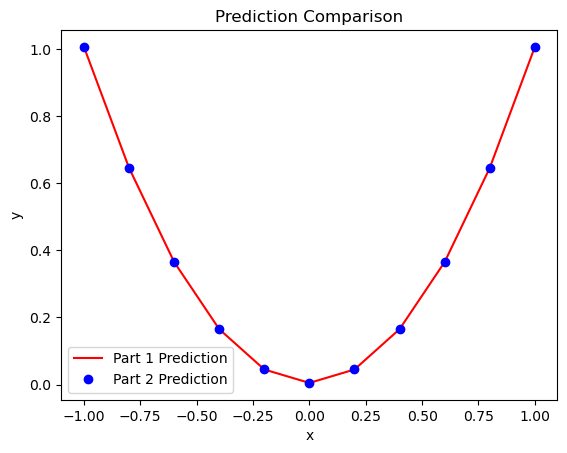

In [33]:
x_test = np.linspace(-1, 1, 11)
import matplotlib.pyplot as plt

Pt1_ytest = w1[0] + w1[1] * x_test + w1[2] * x_test ** 2
Pt2_ytest = w2[0] + w2[1] * x_test + w2[2] * x_test ** 2

plt.figure()
plt.plot(x_test, Pt1_ytest, '-', color = 'r', label = 'Part 1 Prediction')
plt.plot(x_test, Pt2_ytest, 'o', color = 'b', label = 'Part 2 Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Prediction Comparison')
plt.show()